# The $Q^2$ reconstruction

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


## re-scaling of the cosmic in the overlay, and application of the cuts

In [5]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,r'$p_t$ imbalance'
            ]
overlay_scalings = dict()
f_Cosmic=0.8658
overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.866': {   '1mu-1p': 0.03578088045074869,
                                             'CC 1p 0pi': 0.03578088045074869,
                                             'N(Ovelay)/N(On)': 7.667022982362373,
                                             'cosmic': 0.22106943595880704,
                                             'other pairs': 0.03578088045074868}}
applied cuts to overlay
applied cuts to data


## The $Q^2$ momentum reconstruction

In [6]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_gen_vs_rec_CCIpOpi.pdf


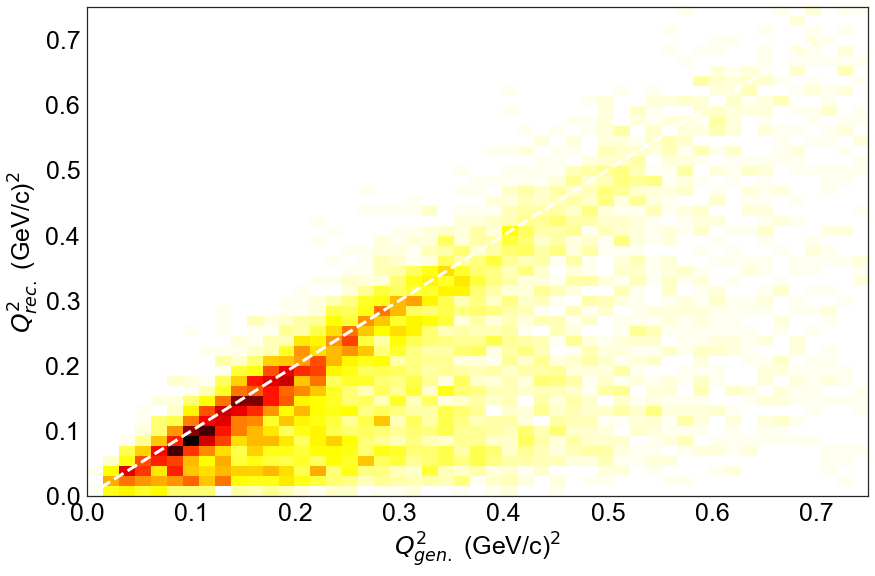

In [7]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_Q2'],selected_CC1p0pi['reco_Q2']
             ,bins=linspace(0.,0.75,50),ax=ax);
ax.plot([0.,0.75],[0.,0.75],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$Q^2_{gen.}$ (GeV/c)$^2$',r'$Q^2_{rec.}$ (GeV/c)$^2$',do_add_legend=True)
save_figure(figures_path+'Q2_gen_vs_rec_CCIpOpi.pdf')

mean,sigma: 0.094574664162 0.128882689629
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_gen_rec_CCIpOpi.pdf


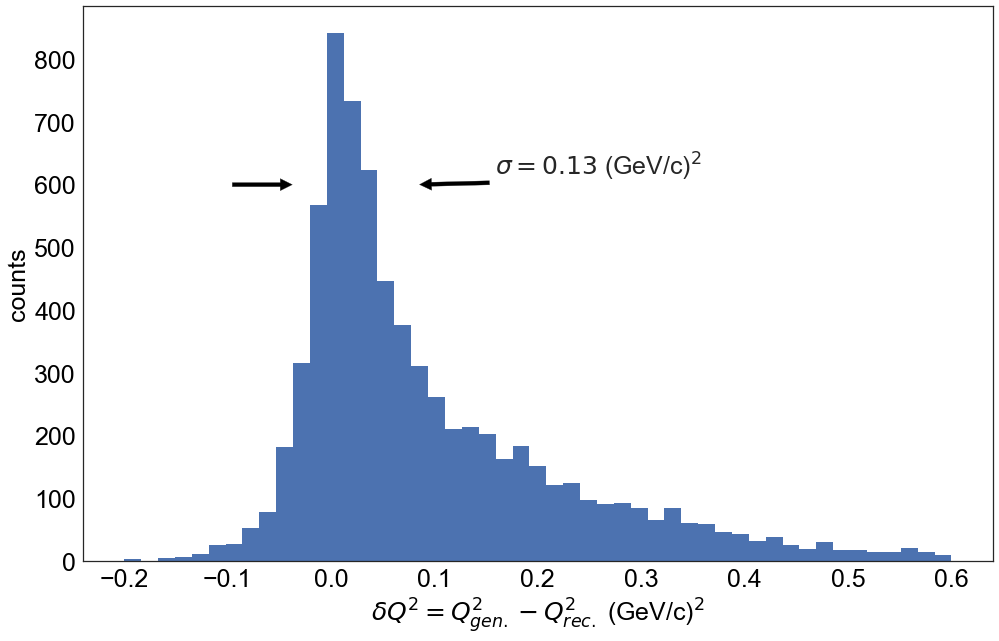

In [8]:
fig,ax=plt.subplots(figsize=(14,9))
delta = selected_CC1p0pi['truth_Q2'] - selected_CC1p0pi['reco_Q2']
truncated = selected_CC1p0pi[np.abs(delta)<0.6]
delta_truncated = truncated['truth_Q2'] - truncated['reco_Q2']
mean,sigma = np.mean(delta_truncated),np.std(delta_truncated)
print 'mean,sigma:',mean,sigma
plt.hist(delta,bins=linspace(-0.2,0.6,50))
ax.annotate('',xy=(mean-sigma,600),xytext=(mean-1.5*sigma,600),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(r'$\sigma=%.2f$ (GeV/c)$^2$'%(sigma),xy=(mean-0.1*sigma,600),xytext=(mean+0.5*sigma,615),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,r'$\delta Q^2 = Q^2_{gen.}-Q^2_{rec.}$ (GeV/c)$^2$','counts')
plt.tight_layout()
save_figure(figures_path+'Q2_gen_rec_CCIpOpi.pdf')

mean,sigma: 29.2945830265 34.4516428394
mean-sigma: -5.15705981298 mean-1.5*sigma: -22.3828812327
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_gen_rec_gen_CCIpOpi.pdf


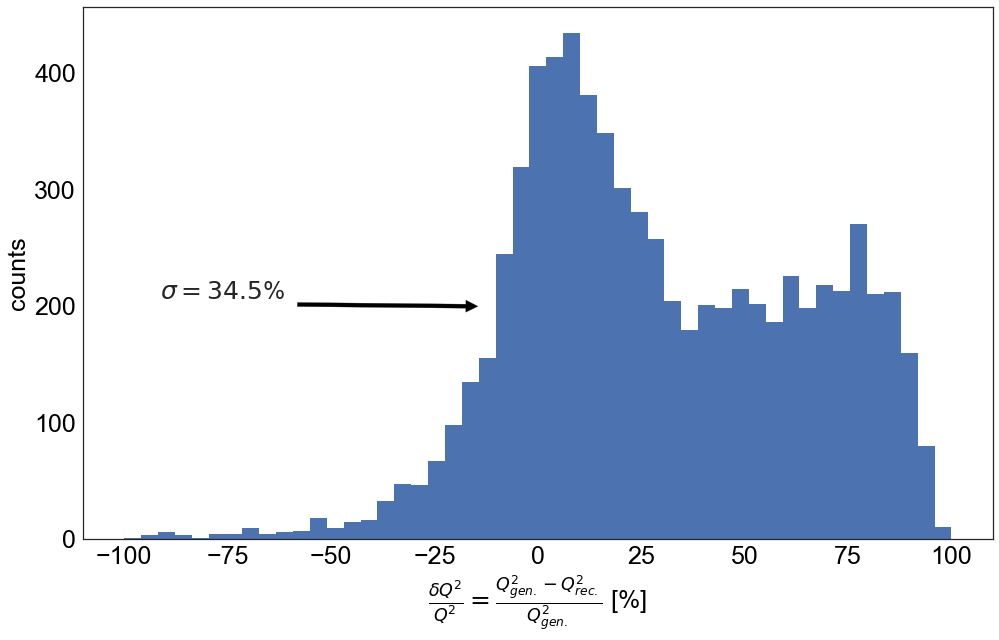

In [9]:
fig,ax=plt.subplots(figsize=(14,9))
R = 100*(selected_CC1p0pi['truth_Q2'] - selected_CC1p0pi['reco_Q2'])/selected_CC1p0pi['truth_Q2']
truncated = selected_CC1p0pi[np.abs(R)<100]
R_truncated = 100*(truncated['truth_Q2'] - truncated['reco_Q2'])/truncated['truth_Q2']
mean,sigma = np.mean(R_truncated),np.std(R_truncated)
print 'mean,sigma:',mean,sigma
plt.hist(R,bins=linspace(-100,100,50))
print 'mean-sigma:',(mean-sigma),'mean-1.5*sigma:',(mean-1.5*sigma)
ax.annotate((r'$\sigma=%.1f$'%(sigma)+'%'),xy=(mean-1.2*sigma,200),xytext=(mean-3.5*sigma,206),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,r'$\frac{\delta Q^2}{Q^2} = \frac{Q^2_{gen.}-Q^2_{rec.}}{Q^2_{gen.}}$ [%]','counts')
plt.tight_layout()
save_figure(figures_path+'Q2_gen_rec_gen_CCIpOpi.pdf')

## The main reason for this impairment in the $Q^2$ reconstruction is the breakage of the muon tracks

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Pmu_gen_vs_rec_CCIpOpi.pdf


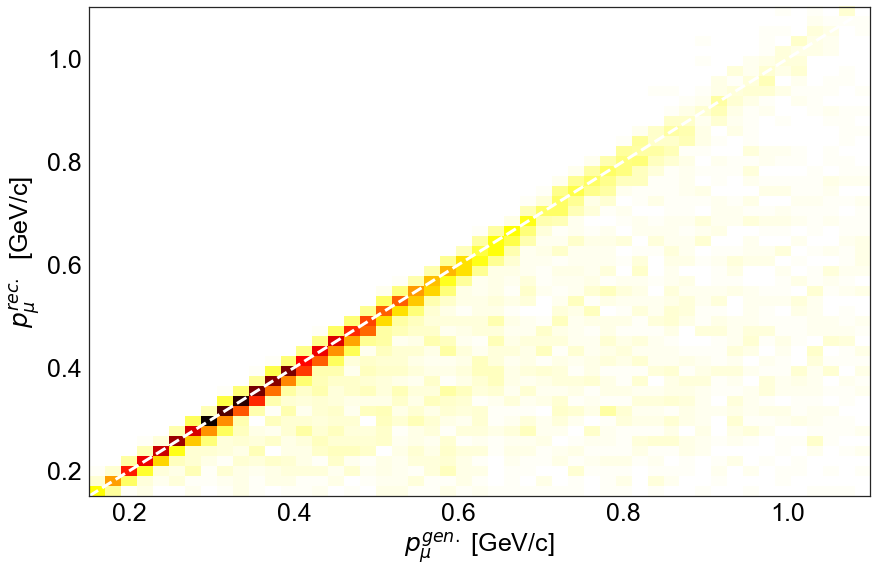

In [10]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_Pmu'],selected_CC1p0pi['reco_Pmu']
             ,bins=linspace(0.15,1.1,50),ax=ax);
ax.plot([0.15,1.1],[0.15,1.1],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$p_{\mu}^{gen.}$ [GeV/c]',r'$p_{\mu}^{rec.}$  [GeV/c]',do_add_legend=True)
save_figure(figures_path+'Pmu_gen_vs_rec_CCIpOpi.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/l_muCandidate_gen_vs_rec_CCIpOpi.pdf


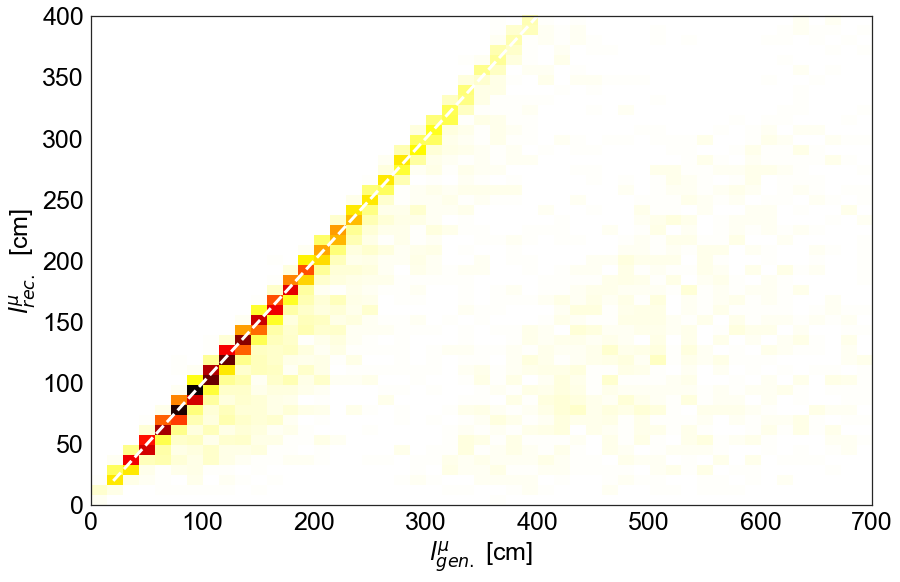

In [11]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_l_muCandidate'],selected_CC1p0pi['l_muCandidate']
             ,bins=(linspace(0,700,50),linspace(0,400,50)),ax=ax);
ax.plot([20,600],[20,600],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$l^{\mu}_{gen.}$ [cm]',r'$l^{\mu}_{rec.}$  [cm]',do_add_legend=True)
save_figure(figures_path+'l_muCandidate_gen_vs_rec_CCIpOpi.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Pmu_theta_gen_vs_rec_CCIpOpi.pdf


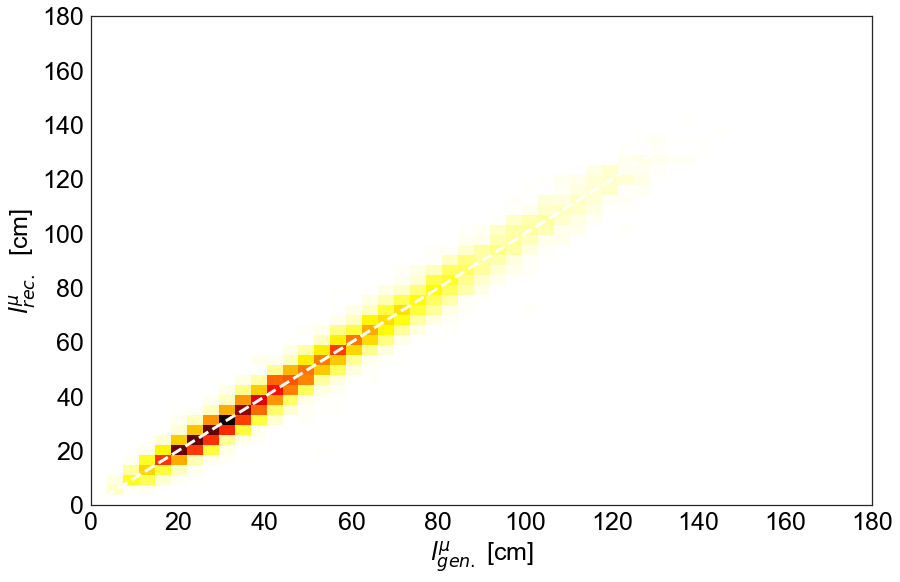

In [12]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(180./np.pi*selected_CC1p0pi['truth_Pmu_theta'],180./np.pi*selected_CC1p0pi['reco_Pmu_theta']
             ,bins=linspace(0,180,50),ax=ax);
ax.plot([0,180],[0,180],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$l^{\mu}_{gen.}$ [cm]',r'$l^{\mu}_{rec.}$  [cm]',do_add_legend=True)
save_figure(figures_path+'Pmu_theta_gen_vs_rec_CCIpOpi.pdf')

# The $Q^2$ distribution in the selected CCQE-like events

In [13]:
var,x_label,bins='reco_Q2',r'$Q^{2}$ (GeV/c)$^2$',linspace(0.,1.0,11)
bin_width = 0.5*(bins[1]-bins[0])
xlim=(np.min(bins)-0.5*bin_width,np.max(bins)+0.5*bin_width)

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/reco_Q2_selected_events.pdf


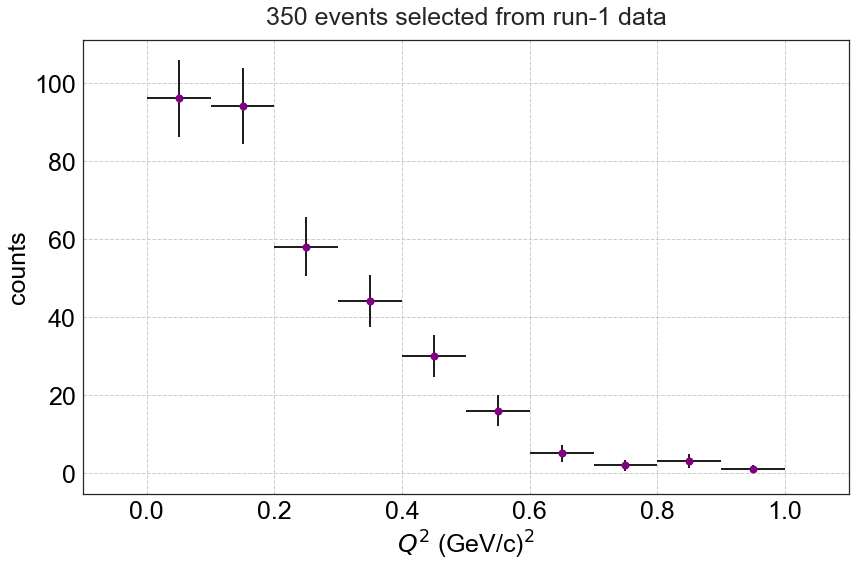

In [14]:
fig=plt.figure(figsize=(12,8))

ax=fig.add_subplot(1,1,1)
_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events,OnBeamFV=OnBeamFV,markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
set_axes(ax,x_label,'counts',title='%d events selected from run-1 data'%len(selected_events),do_add_grid=True,alpha_grid=1)
plt.tight_layout()
save_figure(figures_path+'reco_Q2_selected_events.pdf')

## Correcting the measured proton momentum distribution for background impurities and signal inefficiencies

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_purity_after_cuts.pdf


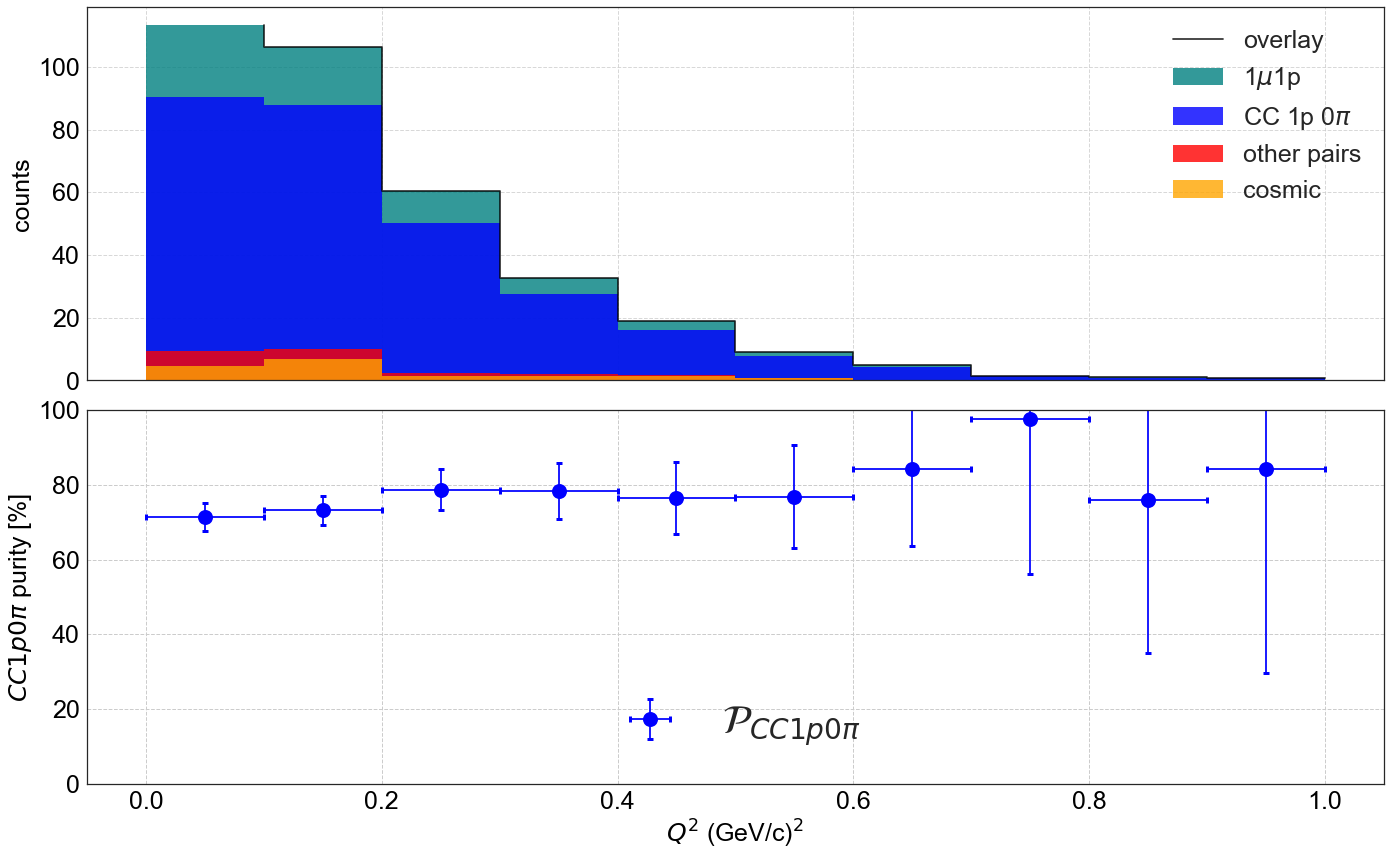

In [15]:
fig=plt.figure(figsize=(19.416,12))
ax = fig.add_subplot(2,1,1)
h_stack,_=plot_stacked_MCsamples( OverlaySamples=reducedOverlay['Pt & delta phi']
                                 , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                                 , ax=ax, var=var, x_label='',y_label='counts', bins=bins 
                                 , remove_ticks_x=True
                                 , fontsize=25, stackColor='black',stackLabel='overlay'
                              );
ax.legend(fontsize=25)
ax = fig.add_subplot(2,1,2)
mid,purity,purity_err = plot_purity( OverlaySamples=selected_overlay,debug=0               
            , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]                               
            , ax=ax, var=var, bins=bins 
            , purity_pair_type='CC 1p 0pi'            
            , x_label=x_label, y_label=r'$CC1p0\pi$ purity [%]'                            
            , color='blue', ecolor='blue',label=r'$\mathcal{P}_{CC 1p 0\pi}$'
           );
plt.legend(fontsize=40,loc='lower center')
plt.tight_layout()
plt.subplots_adjust(hspace=0.08)
save_figure(figures_path+'Q2_purity_after_cuts.pdf')

# The $CC1p0\pi$ efficiency is taken from the entire sample of $CC1p0\pi$ events in the overlay

In [16]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'

926088  GENIE interaction


In [17]:
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π events in overlay'

243732 GENIE CC1p0π events
7304 selected CC1p0π events in overlay


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_efficiency_after_cuts.pdf


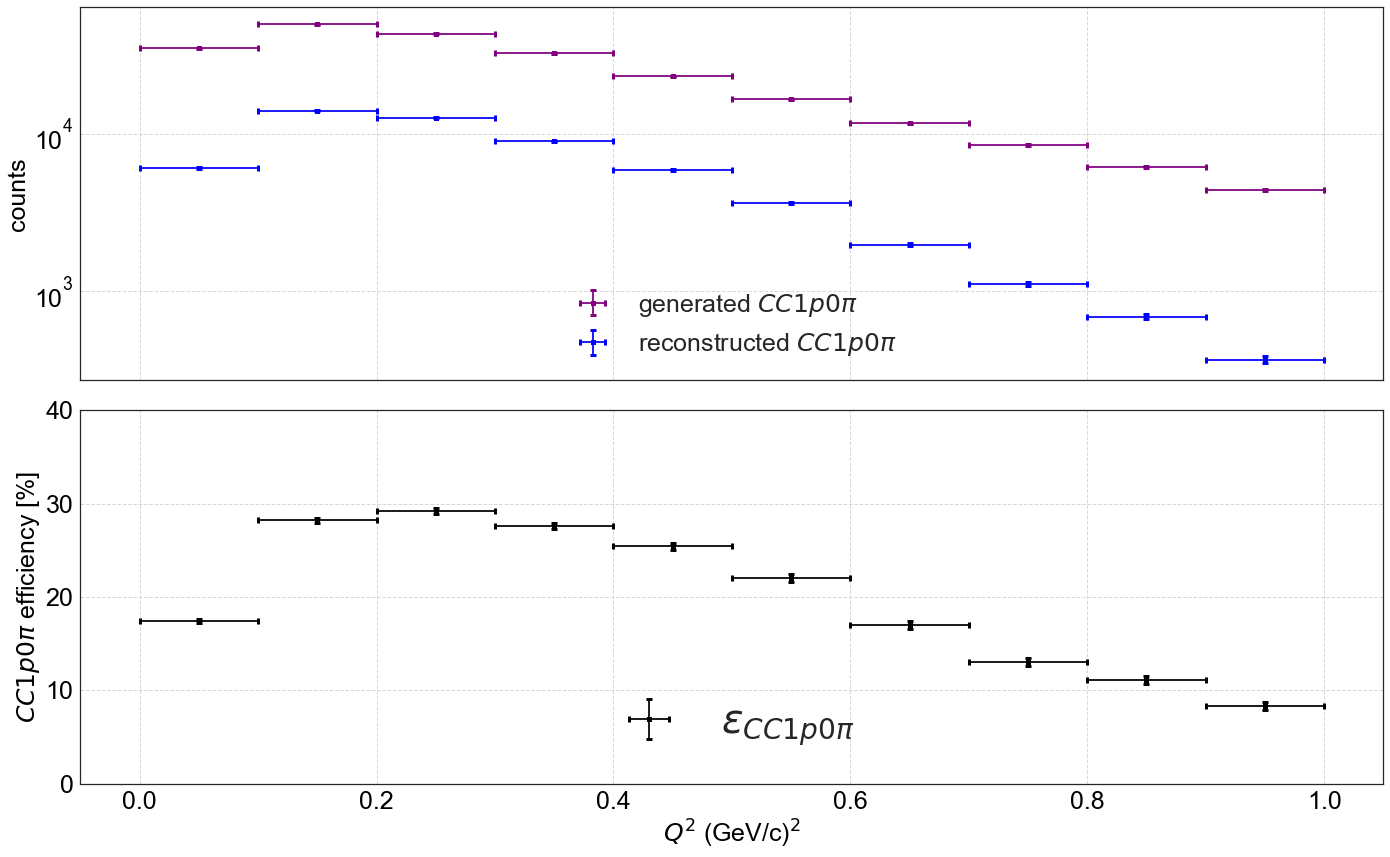

In [18]:
overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
fig=plt.figure(figsize=(19.416,12))
ax = fig.add_subplot(2,1,1)
h = dict()
for sam,sname,slabel,color in zip([GENIE_CC1p0pi,selected_CC1p0pi]
                                  ,['gen','rec']
                                  ,['generated $CC 1p 0\pi$','reconstructed $CC 1p 0\pi$']                               
                                  ,['purple','blue']):
    h[sname],edges = np.histogram(sam['truth_Q2'],bins=bins)
    if sname=='rec':
        h[sname] = h[sname]*overlay_scaling['N(Ovelay)/N(On)']
    mid = 0.5*(edges[1:]+edges[:-1])
    bin_width=0.5*(edges[1]-edges[0])
    plt.errorbar(x=mid,xerr=bin_width,y=h[sname],yerr=np.sqrt(h[sname]),color=color
                 ,markersize=5,fmt='s',capsize=3,capthick=3,label=slabel)
set_axes(ax, x_label='', y_label=r'counts',remove_ticks_x=True
         ,do_add_grid=True,do_add_legend=True,legend_loc='lower center')
ax.set_yscale('log')

eff = h['rec']/h['gen']
eff_err = eff * np.sqrt(1./h['rec'] + 1./h['gen'])

ax = fig.add_subplot(2,1,2)
plt.errorbar(x=mid , xerr=bin_width , y=100*eff , yerr=100*eff_err , color='black'
             ,markersize=5,fmt='s',capsize=3,capthick=3,label=r'$\epsilon_{CC 1p 0\pi}$')
set_axes(ax, x_label=x_label
         , y_label=r'$CC1p0\pi$ efficiency [%]',yticks=[0,10,20,30,40],do_add_grid=True)
plt.legend(fontsize=40,loc='lower center')
plt.tight_layout()
plt.subplots_adjust(hspace=0.08)
save_figure(figures_path+'Q2_efficiency_after_cuts.pdf')

# The $CC1p0\pi$ correction is the purity/efficiency

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_correction_after_cuts.pdf


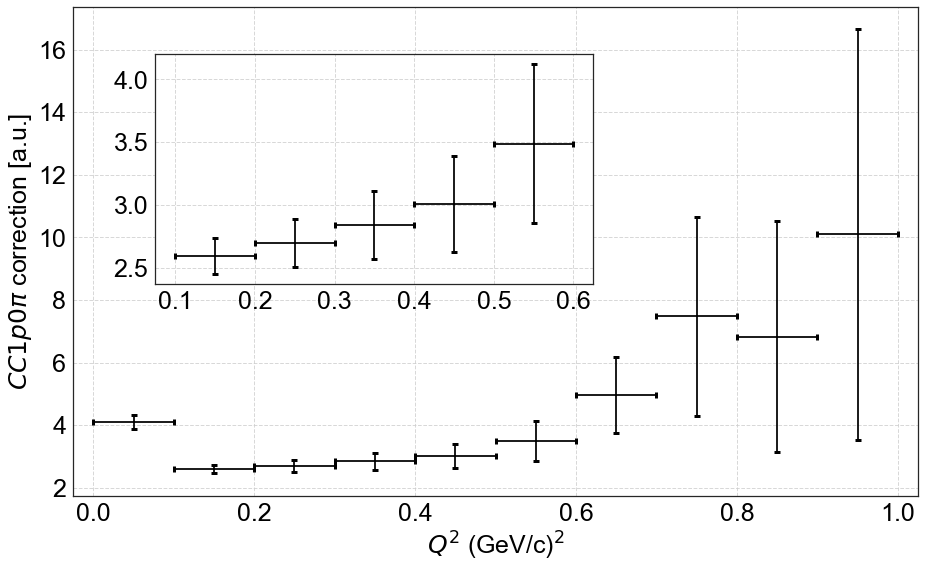

In [19]:
C = purity/eff
C_err = C * np.sqrt( np.square(purity_err/purity) + np.square(eff_err/eff))

fig=plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
plt.errorbar(x=mid , xerr=bin_width , y=C , yerr=C_err 
             ,color='black'
             ,markersize=2,fmt='s',capsize=3,capthick=3)
set_axes(ax, x_label=x_label,xlim=xlim
         , y_label=r'$CC1p0\pi$ correction [a.u.]'
         ,do_add_grid=True,do_add_legend=True)

# location for the zoomed portion 
sub_axes = plt.axes([.17, .5, .47, .40]) 
# plot the zoomed portion
sub_axes.errorbar(x=mid[1:-4] , xerr=bin_width , y=C[1:-4] , yerr=C_err[1:-4]
             ,color='black'
             ,markersize=2,fmt='s',capsize=3,capthick=3)
set_axes(sub_axes, x_label='',do_add_grid=True,yticks=(2.5,3,3.5,4))
plt.tight_layout()
plt.subplots_adjust(hspace=0.08)
save_figure(figures_path+'Q2_correction_after_cuts.pdf')

## now apply the correction to the data

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/reco_Q2_selected_events_corrected.pdf


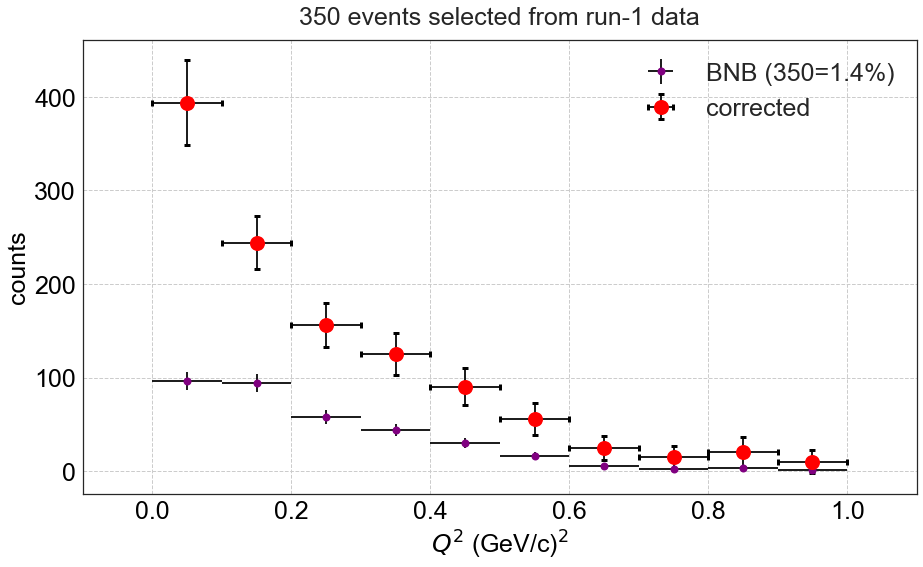

In [20]:
fig=plt.figure(figsize=(12.944,8))

ax=fig.add_subplot(1,1,1)
_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events,OnBeamFV=OnBeamFV,markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
h_OnBeam_corrected = h_OnBeam*C
h_OnBeam_corrected_err = np.sqrt(np.square(h_OnBeam*C_err)+ np.square(np.sqrt(h_OnBeam)*C))

plt.errorbar(x=mid , xerr=bin_width , y=h_OnBeam_corrected , yerr=h_OnBeam_corrected_err
             ,color='red',ecolor='black',label='corrected'
             ,markersize=15,fmt='o',capsize=3,capthick=3)
set_axes(ax,x_label,'counts',title='%d events selected from run-1 data'%len(selected_events),do_add_grid=True,alpha_grid=1,do_add_legend=True)
plt.tight_layout()
save_figure(figures_path+'reco_Q2_selected_events_corrected.pdf')

# look for the distribution only two bins - to extract mA

In [21]:
Q2min_bins = [0.1,0.25]
Q2max_bins = [Q2min_bins[1],0.6]
# Q2min_bins = linspace(0,1,11)
# Q2max_bins = linspace(0.1,1.1,11)

In [22]:
Ntot=0
Q2var = 'reco_Q2'
overlay_scaling = overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
purity_pair_type='CC 1p 0pi'
debug=2

Q2_averages,Q2_stds = [],[]
h,RQ2 = dict(),dict()
Noverlay_bin = dict()

h['measured'],h['measured err'] = [],[]
h['corrected'],h['corrected err'] = [],[]
pur,pur_err = [],[]
eff,eff_err = [],[]
Corr,Corr_err = [],[]
for Q2min,Q2max in zip(Q2min_bins,Q2max_bins):    

    # measured 
    sam_bin = selected_events[(selected_events[Q2var]>Q2min)&(selected_events[Q2var]<Q2max)]
    N_bin = float(len(sam_bin))
    N_bin_err = np.sqrt(N_bin)
    Ntot += N_bin
    
    Q2_averages.append( np.mean(sam_bin[Q2var]) )
    Q2_stds.append( np.std(sam_bin[Q2var]) )
    
    h['measured'].append( N_bin )
    h['measured err'].append( np.sqrt( N_bin ) )       
    
    # purity 
    for i_pair_type,pair_type in enumerate(pair_types):
        overlay_sam = selected_overlay[pair_type]
        Noverlay_bin[pair_type] = len(overlay_sam[(overlay_sam[Q2var]>Q2min)&(overlay_sam[Q2var]<Q2max)])
        Noverlay_bin[pair_type+' scaled'] = overlay_scaling[pair_type]*Noverlay_bin[pair_type]
    num = Noverlay_bin[purity_pair_type+' scaled']*overlay_scaling['N(Ovelay)/N(On)']
    den = (Noverlay_bin['1mu-1p scaled']+Noverlay_bin['other pairs scaled']+Noverlay_bin['cosmic scaled'])*overlay_scaling['N(Ovelay)/N(On)']
    pur_bin = num/den
    pur_err_bin = pur_bin*np.sqrt((1./num if num>0.5 else 0) + (1./den if den>0.5 else 0))
    pur.append(pur_bin)
    pur_err.append(pur_err_bin)

    
    # efficiency
    GENIE_CC1p0pi_bin = GENIE_CC1p0pi[(GENIE_CC1p0pi['truth_Q2']>Q2min)&(GENIE_CC1p0pi['truth_Q2']<Q2max)]
    selected_CC1p0pi_bin = selected_CC1p0pi[(selected_CC1p0pi['truth_Q2']>Q2min)&(selected_CC1p0pi['truth_Q2']<Q2max)]
    num = float(len(selected_CC1p0pi_bin))*overlay_scaling['N(Ovelay)/N(On)']
    den = float(len(GENIE_CC1p0pi_bin))
    eff_bin = num/den
    eff_err_bin = eff_bin*np.sqrt((1./num if num>0.5 else 0) + (1./den if den>0.5 else 0))
    eff.append(eff_bin)
    eff_err.append(eff_err_bin)

    
    # correction
    Corr_bin = pur_bin/eff_bin if eff_bin>0.01 else pur_bin/0.01
    Corr_err_bin = Corr_bin*np.sqrt( np.square(pur_err_bin/pur_bin if pur_bin>0.01 else 0) + np.square(eff_err_bin/eff_bin if eff_bin>0.01 else 0))
    Corr.append(Corr_bin)
    Corr_err.append(Corr_err_bin)

    NCorr_bin = N_bin*Corr_bin
    NCorr_err_bin = np.sqrt(np.square(N_bin*Corr_err_bin)+ np.square(np.sqrt(N_bin)*Corr_bin))
    h['corrected'].append( NCorr_bin )
    h['corrected err'].append( NCorr_err_bin )

if debug:
    pp.pprint(h)
    print Corr
    print Corr_err

{   'corrected': [322.4218523469306, 349.9532464023261],
    'corrected err': [32.612673349055115, 38.376438442096791],
    'measured': [125.0, 117.0],
    'measured err': [11.180339887498949, 10.816653826391969]}
[2.579374818775445, 2.9910533880540693]
[0.12183652155390841, 0.17641286194239769]


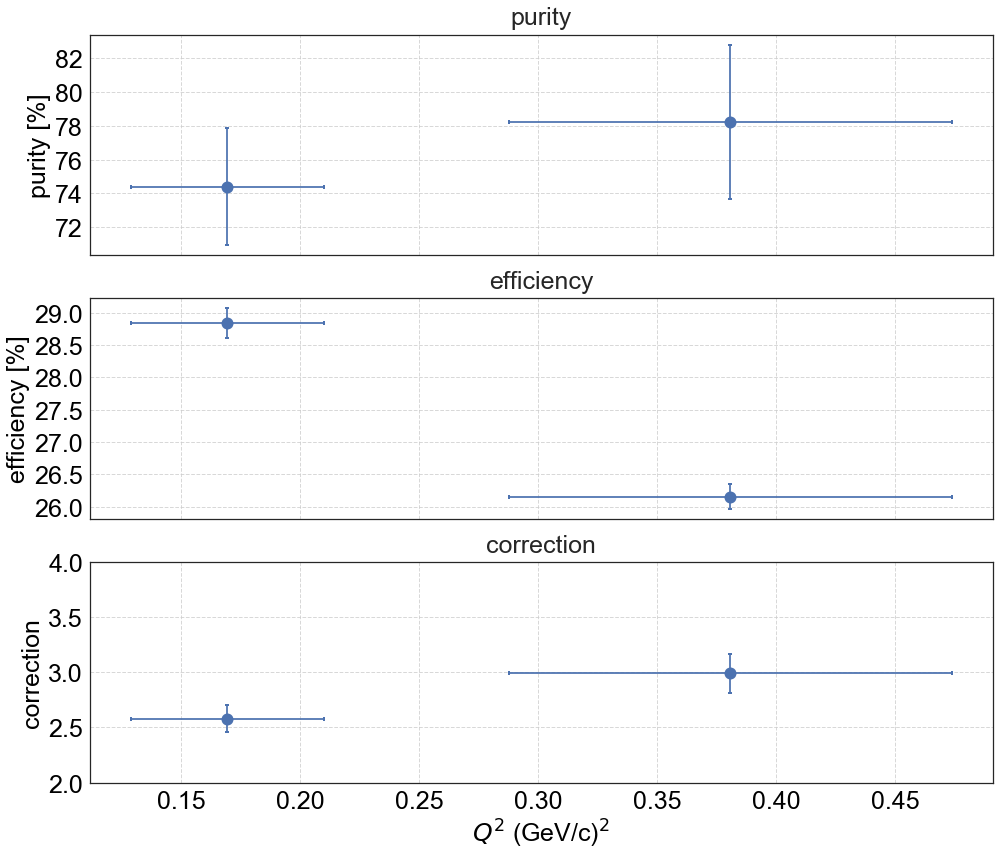

In [23]:
    
fig=plt.figure(figsize=(14,12))
ax=fig.add_subplot(3,1,1)
plt.errorbar( x = Q2_averages, xerr = Q2_stds ,y = 100*np.array(pur), yerr = 100*np.array(pur_err)
             ,fmt='o',markersize=12,capsize=2,capthick=2)
set_axes(ax,'','purity [%]',title='purity',do_add_grid=True,remove_ticks_x=True)

ax=fig.add_subplot(3,1,2)
plt.errorbar( x = Q2_averages, xerr = Q2_stds ,y = 100*np.array(eff), yerr = 100*np.array(eff_err)
             ,fmt='o',markersize=12,capsize=2,capthick=2)
set_axes(ax,'','efficiency [%]',title='efficiency',do_add_grid=True,remove_ticks_x=True)

ax=fig.add_subplot(3,1,3)
plt.errorbar( x = Q2_averages, xerr = Q2_stds ,y = Corr, yerr = Corr_err
             ,fmt='o',markersize=12,capsize=2,capthick=2)
set_axes(ax,x_label,'correction',title='correction',do_add_grid=True,yticks=(2,2.5,3,3.5,4))

plt.tight_layout()

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/reco_Q2_twobins.pdf


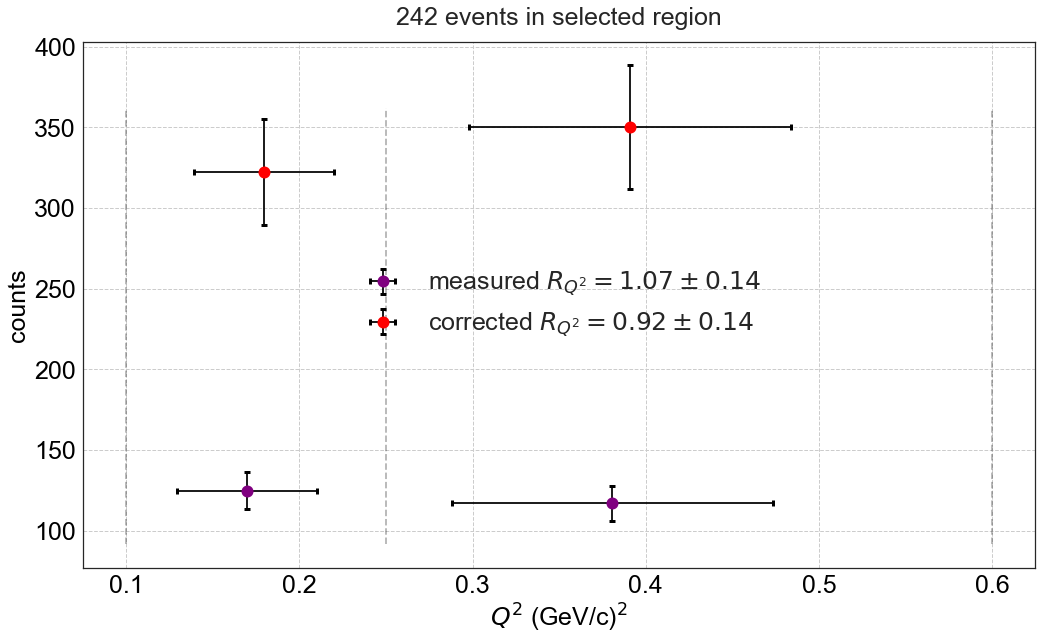

In [24]:
fig=plt.figure(figsize=(14.592,9))
ax=fig.add_subplot(1,1,1)
for itype,(Rtype,color) in enumerate(zip(['measured','corrected']
                                     ,['purple','red'])):
    RQ2[Rtype] = h[Rtype][0]/h[Rtype][1]
    RQ2[Rtype+' err'] = RQ2[Rtype]*np.sqrt(np.square(h[Rtype+' err'][0]/h[Rtype][0]) + np.square(h[Rtype+' err'][1]/h[Rtype][1]))
    plt.errorbar( x = Q2_averages+0.01*itype*np.ones(len(Q2_averages)), xerr = Q2_stds
             ,y = h[Rtype], yerr = h[Rtype+' err']
                 ,color=color,ecolor='black'
             ,fmt='o',markersize=12,capsize=3,capthick=3
             ,label=Rtype+' $R_{Q^2}=%.2f\pm%.2f$'%(RQ2[Rtype],RQ2[Rtype+' err']))
    
# depict the low/high bins boundaries
plt.plot([Q2min_bins[0],Q2min_bins[0]],[np.min(ax.get_ylim()),0.9*np.max(ax.get_ylim())],'--'
         ,[Q2min_bins[1],Q2min_bins[1]],[np.min(ax.get_ylim()),0.9*np.max(ax.get_ylim())],'--'
         ,[Q2max_bins[1],Q2max_bins[1]],[np.min(ax.get_ylim()),0.9*np.max(ax.get_ylim())],'--',color='black',alpha=0.3)

set_axes(ax,x_label,'counts',title='%d events in selected region'%Ntot
         ,do_add_grid=True,alpha_grid=1,do_add_legend=True,legend_loc='center'
#          ,ylim=(0,500)
        )
plt.tight_layout()
save_figure(figures_path+'reco_Q2_twobins.pdf')

In [25]:
concat_overlay = pd.concat([selected_overlay['1mu-1p']
                            ,selected_overlay['cosmic']
                            ,selected_overlay['other pairs']])
print len(concat_overlay),'events in concat_overlay'

9384 events in concat_overlay


In [26]:
Q2_averages,Q2_stds = [],[]
h,RQ2 = dict(),dict()
Noverlay_bin = dict()

h['overlay'],h['overlay err'] = [],[]
h['1mu-1p'],h['1mu-1p err'] = [],[]
h['CC 1p 0pi'],h['CC 1p 0pi err'] = [],[]


for Q2min,Q2max in zip(Q2min_bins,Q2max_bins):    

    sam_bin = concat_overlay[(concat_overlay[Q2var]>Q2min)&(concat_overlay[Q2var]<Q2max)]
    N_bin = float(len(sam_bin))
    N_bin_err = np.sqrt(N_bin)
    
    Q2_averages.append( np.mean(sam_bin[Q2var]) )
    Q2_stds.append( np.std(sam_bin[Q2var]) )
    
    h['overlay'].append( N_bin )
    h['overlay err'].append( np.sqrt( N_bin ) )       
    
    sam_bin = selected_overlay['1mu-1p'][(selected_overlay['1mu-1p'][Q2var]>Q2min)&(selected_overlay['1mu-1p'][Q2var]<Q2max)]
    N_bin = float(len(sam_bin))
    N_bin_err = np.sqrt(N_bin)
    
    h['1mu-1p'].append( N_bin )
    h['1mu-1p err'].append( np.sqrt( N_bin ) )       

    sam_bin = selected_overlay['CC 1p 0pi'][(selected_overlay['CC 1p 0pi'][Q2var]>Q2min)&(selected_overlay['CC 1p 0pi'][Q2var]<Q2max)]
    N_bin = float(len(sam_bin))
    N_bin_err = np.sqrt(N_bin)
    
    h['CC 1p 0pi'].append( N_bin )
    h['CC 1p 0pi err'].append( np.sqrt( N_bin ) )       

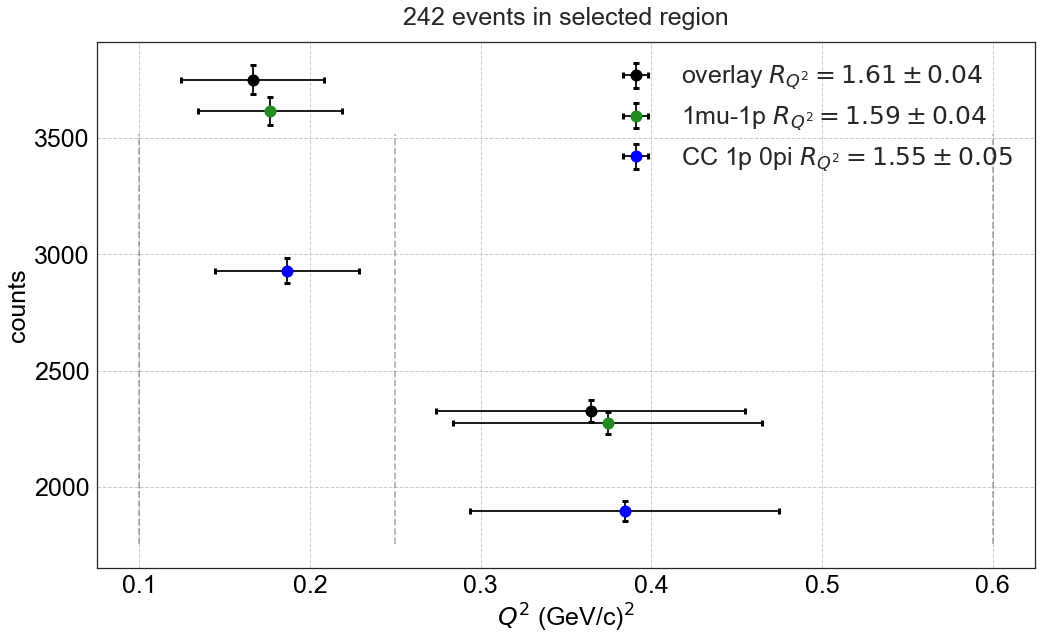

In [27]:
fig=plt.figure(figsize=(14.592,9))
ax=fig.add_subplot(1,1,1)
for itype,(Rtype,color) in enumerate(zip(['overlay','1mu-1p','CC 1p 0pi']
                                         ,['black','forestgreen','blue'])):
    RQ2[Rtype] = h[Rtype][0]/h[Rtype][1]
    RQ2[Rtype+' err'] = RQ2[Rtype]*np.sqrt(np.square(h[Rtype+' err'][0]/h[Rtype][0]) + np.square(h[Rtype+' err'][1]/h[Rtype][1]))
    plt.errorbar( x = Q2_averages+0.01*itype*np.ones(len(Q2_averages)), xerr = Q2_stds
             ,y = h[Rtype], yerr = h[Rtype+' err']
                 ,color=color,ecolor='black'
             ,fmt='o',markersize=12,capsize=3,capthick=3
             ,label=Rtype+' $R_{Q^2}=%.2f\pm%.2f$'%(RQ2[Rtype],RQ2[Rtype+' err']))
    
# depict the low/high bins boundaries
plt.plot([Q2min_bins[0],Q2min_bins[0]],[np.min(ax.get_ylim()),0.9*np.max(ax.get_ylim())],'--'
         ,[Q2min_bins[1],Q2min_bins[1]],[np.min(ax.get_ylim()),0.9*np.max(ax.get_ylim())],'--'
         ,[Q2max_bins[1],Q2max_bins[1]],[np.min(ax.get_ylim()),0.9*np.max(ax.get_ylim())],'--',color='black',alpha=0.3)

set_axes(ax,x_label,'counts',title='%d events in selected region'%Ntot
         ,do_add_grid=True,alpha_grid=1,do_add_legend=True,legend_loc='upper right'
        )
plt.tight_layout()

# GENIE samples

In [28]:
mA_array = [0.80,0.90,0.99,1.10,1.20,1.40]
genie_CC1p0pi = dict()
for mA in mA_array:
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_CC1p0pi[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

32163 CC1p0π events in GENIE samples with mA=0.80
33824 CC1p0π events in GENIE samples with mA=0.90
34849 CC1p0π events in GENIE samples with mA=0.99
36196 CC1p0π events in GENIE samples with mA=1.10
37239 CC1p0π events in GENIE samples with mA=1.20
38810 CC1p0π events in GENIE samples with mA=1.40


## Tight FV

7304 CC1p0pi, 5356 good l(mu) reconstruction 1948 bad l(mu) reco.


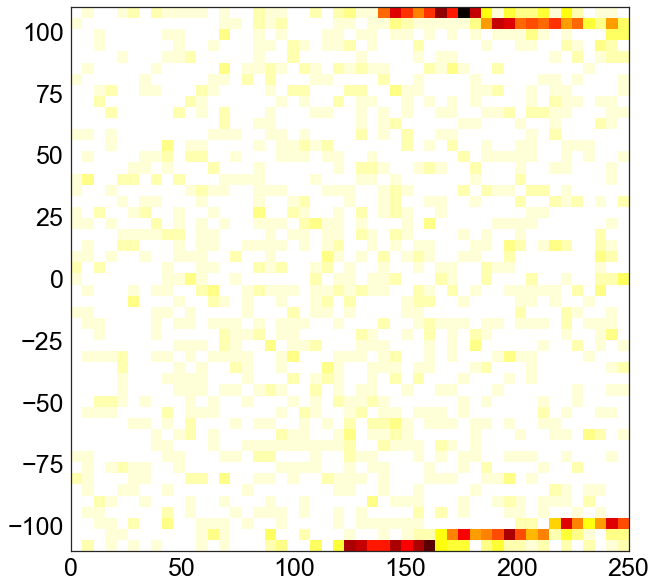

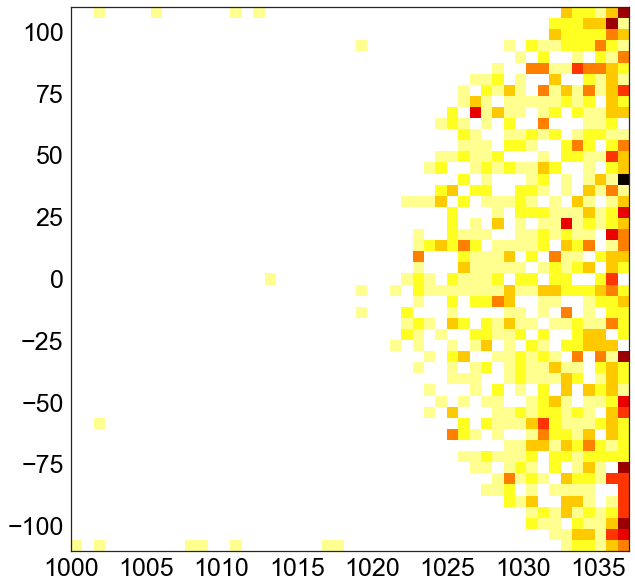

In [29]:
# selected_CC1p0pi
CC1p0pi_good_l_mu = selected_CC1p0pi[np.abs(selected_CC1p0pi['truth_l_muCandidate']-selected_CC1p0pi['l_muCandidate'])<200]
CC1p0pi_bad_l_mu = selected_CC1p0pi[np.abs(selected_CC1p0pi['truth_l_muCandidate']-selected_CC1p0pi['l_muCandidate'])>200]
print len(selected_CC1p0pi),'CC1p0pi,',len(CC1p0pi_good_l_mu),'good l(mu) reconstruction',len(CC1p0pi_bad_l_mu),'bad l(mu) reco.'
# plot_2d_hist(CC1p0pi_bad_l_mu['truth_Q2'],CC1p0pi_bad_l_mu['reco_Q2'],bins=linspace(0.,1.,50));
plot_2d_hist(CC1p0pi_bad_l_mu.endx_muCandidate,CC1p0pi_bad_l_mu.endy_muCandidate,bins=(linspace(0,250,50),linspace(-110,110,50)));
plot_2d_hist(CC1p0pi_bad_l_mu.endz_muCandidate,CC1p0pi_bad_l_mu.endy_muCandidate,bins=(linspace(1000,1037,50),linspace(-110,110,50)));
# CC1p0pi_bad_l_mu[CC1p0pi_bad_l_mu['run']==7004][['run','subrun','event']]

In [30]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

4 selected overlay in tight FV
4064 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


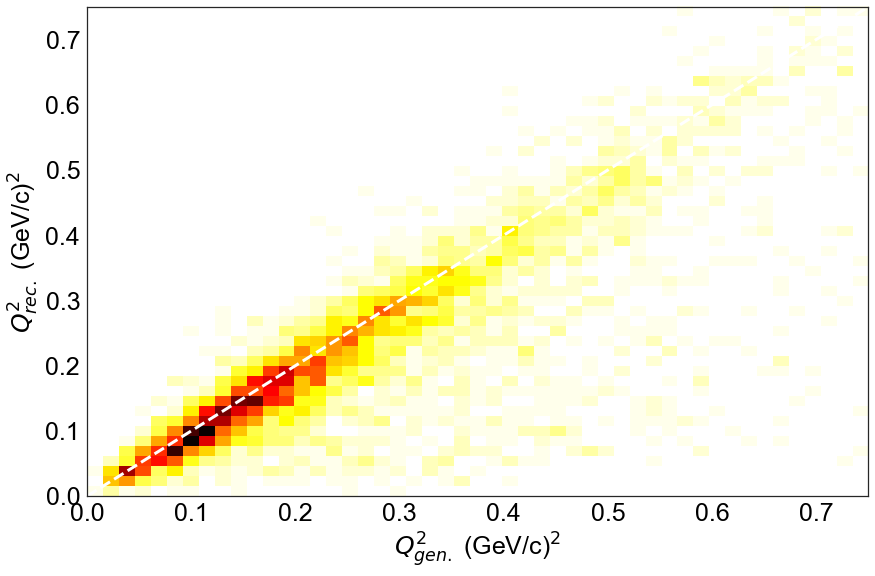

In [31]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi_tightFV['truth_Q2'],selected_CC1p0pi_tightFV['reco_Q2']
             ,bins=linspace(0.,0.75,50),ax=ax);
ax.plot([0.,0.75],[0.,0.75],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$Q^2_{gen.}$ (GeV/c)$^2$',r'$Q^2_{rec.}$ (GeV/c)$^2$',do_add_legend=True)

In [32]:
bins=linspace(0.,1.0,11)
bin_width = 0.5*(bins[1]-bins[0])

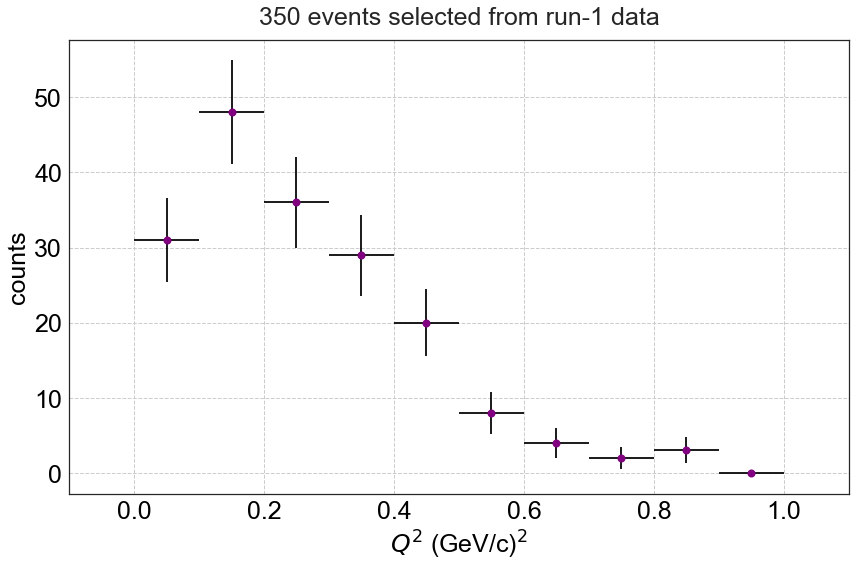

In [33]:
fig=plt.figure(figsize=(12,8))

ax=fig.add_subplot(1,1,1)
_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events_tightFV,OnBeamFV=OnBeamFV,markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
set_axes(ax,x_label,'counts',title='%d events selected from run-1 data'%len(selected_events),do_add_grid=True,alpha_grid=1)
plt.tight_layout()

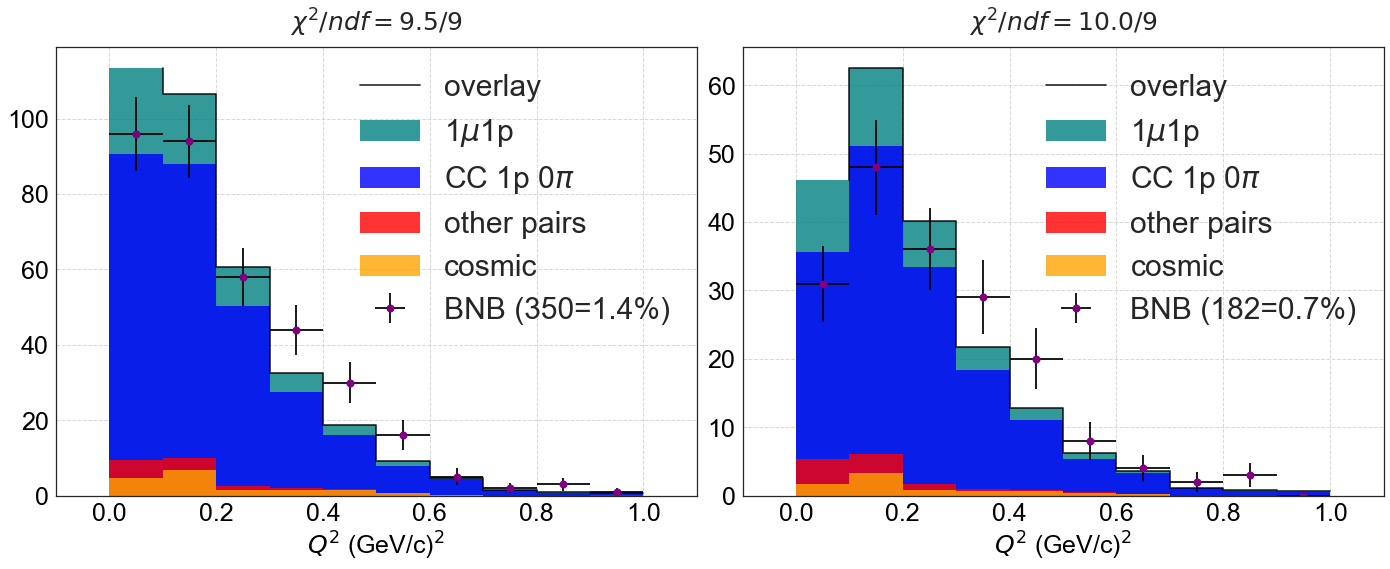

In [34]:
fig=plt.figure(figsize=(19.416,8))
for ioverlay,(OverlaySamples
              ,OnBeamSample) in enumerate(zip([selected_overlay,selected_overlay_tightFV]
                                              ,[selected_events,selected_events_tightFV])):
    ax=fig.add_subplot(1,2,1+ioverlay)
    h_stack,_=plot_stacked_MCsamples( OverlaySamples=OverlaySamples
                               , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                               , ax=ax, var=var, x_label=x_label, bins=bins 
                              );
    _,h_OnBeam = plot_OnBeam(OnBeamSample=OnBeamSample,OnBeamFV=reducedOnBeam['no cut'],markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
    chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                             , h1=h_OnBeam , h2=h_stack
                                             , h1err=np.sqrt(h_OnBeam), h2err=np.sqrt(h_stack)
                                             , debug=0 )
    set_axes(ax,x_label,title=r'$\chi^2/ndf=%.1f/%d$'%(chi2,ndf))
    ax.legend(fontsize=30)
plt.tight_layout()

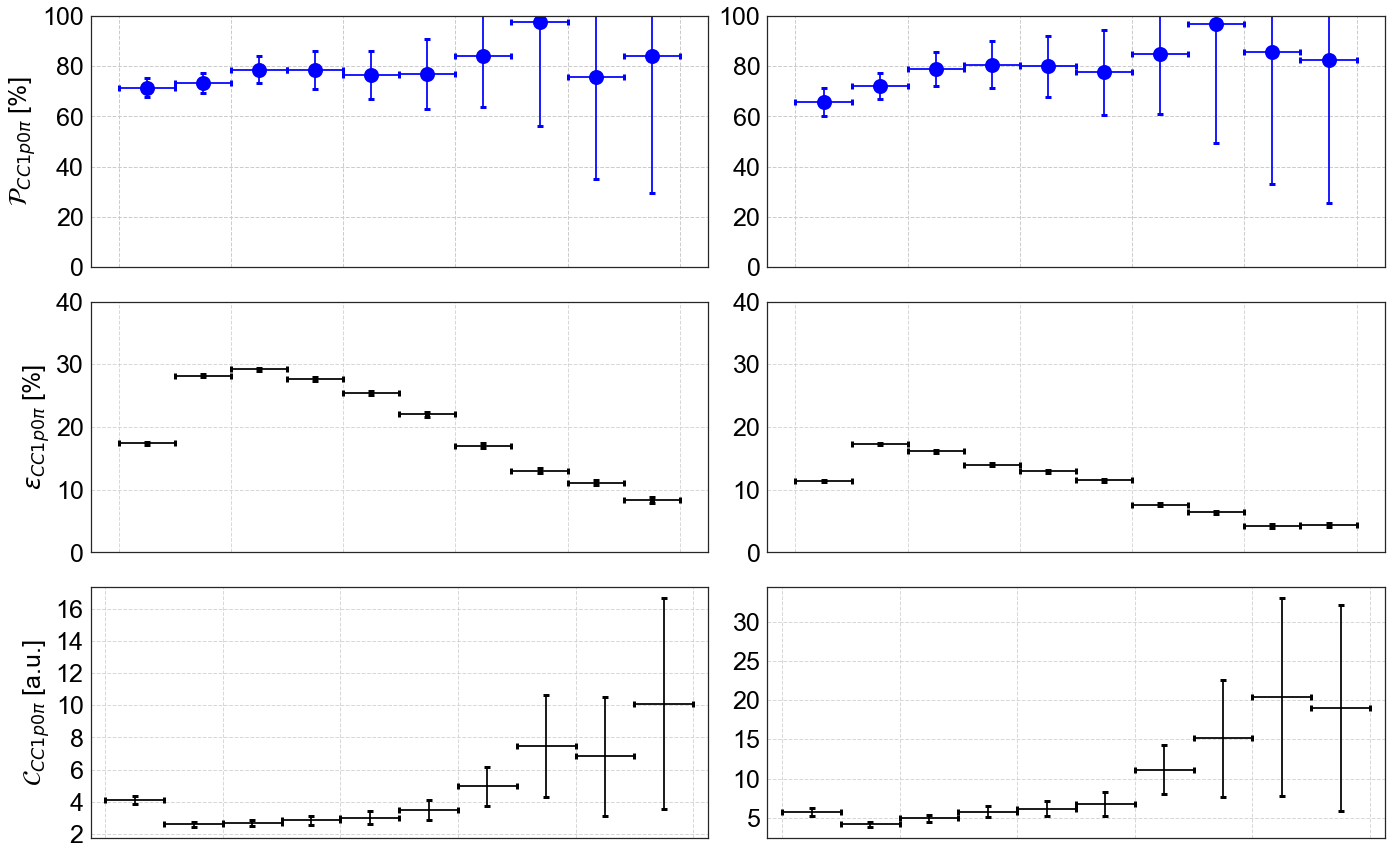

In [35]:
fig=plt.figure(figsize=(19.416,12))

C,C_err = dict(),dict()
for ioverlay,(OverlaySamples
              ,OnBeamSample
              ,CC1p0piSample) in enumerate(zip([selected_overlay,selected_overlay_tightFV]
                                              ,[selected_events,selected_events_tightFV]
                                               ,[selected_CC1p0pi,selected_CC1p0pi_tightFV])):
    ax = fig.add_subplot(3,2, 0 + ioverlay + 1)
    mid,purity,purity_err = plot_purity( OverlaySamples=OverlaySamples,debug=0               
            , overlay_scaling=overlay_scaling
            , ax=ax, var=var, bins=bins 
            , purity_pair_type='CC 1p 0pi'          
            , color='blue', ecolor='blue'
           );
    set_axes(ax,x_label=''
             , y_label=r'$\mathcal{P}_{CC 1p 0\pi}$ [%]' if ioverlay==0 else ''
             ,remove_ticks_x=True)
    
    h = dict()
    for sam,sname,slabel,color in zip([GENIE_CC1p0pi,CC1p0piSample]
                                      ,['gen','rec']
                                      ,['generated $CC 1p 0\pi$','reconstructed $CC 1p 0\pi$']                               
                                      ,['purple','blue']):
        h[sname],edges = np.histogram(sam['truth_Q2'],bins=bins)
        if sname=='rec':
            h[sname] = h[sname]*overlay_scaling['N(Ovelay)/N(On)']
        
    eff = h['rec']/h['gen']
    eff_err = eff * np.sqrt(1./h['rec'] + 1./h['gen'])

    ax = fig.add_subplot(3,2,2 + ioverlay + 1)
    plt.errorbar(x=mid , xerr=bin_width , y=100*eff , yerr=100*eff_err , color='black'
                 ,markersize=5,fmt='s',capsize=3,capthick=3)
    set_axes(ax, x_label='',remove_ticks_x=True
             , y_label=r'$\epsilon_{CC 1p 0\pi}$ [%]' if ioverlay==0 else ''
             ,yticks=[0,10,20,30,40],do_add_grid=True)


    C[ioverlay] = purity/eff
    C_err[ioverlay] = C[ioverlay] * np.sqrt( np.square(purity_err/purity) + np.square(eff_err/eff))

    ax = fig.add_subplot(3,2,4 + ioverlay + 1)
    plt.errorbar(x=mid , xerr=bin_width , y=C[ioverlay] , yerr=C_err[ioverlay]
                 ,color='black'
                 ,markersize=2,fmt='s',capsize=3,capthick=3)
    set_axes(ax, x_label='',xlim=xlim,remove_ticks_x=True
             , y_label=r'$\mathcal{C}_{CC 1p 0\pi}$ [a.u.]' if ioverlay==0 else ''
             ,do_add_grid=True,do_add_legend=True)
plt.tight_layout()

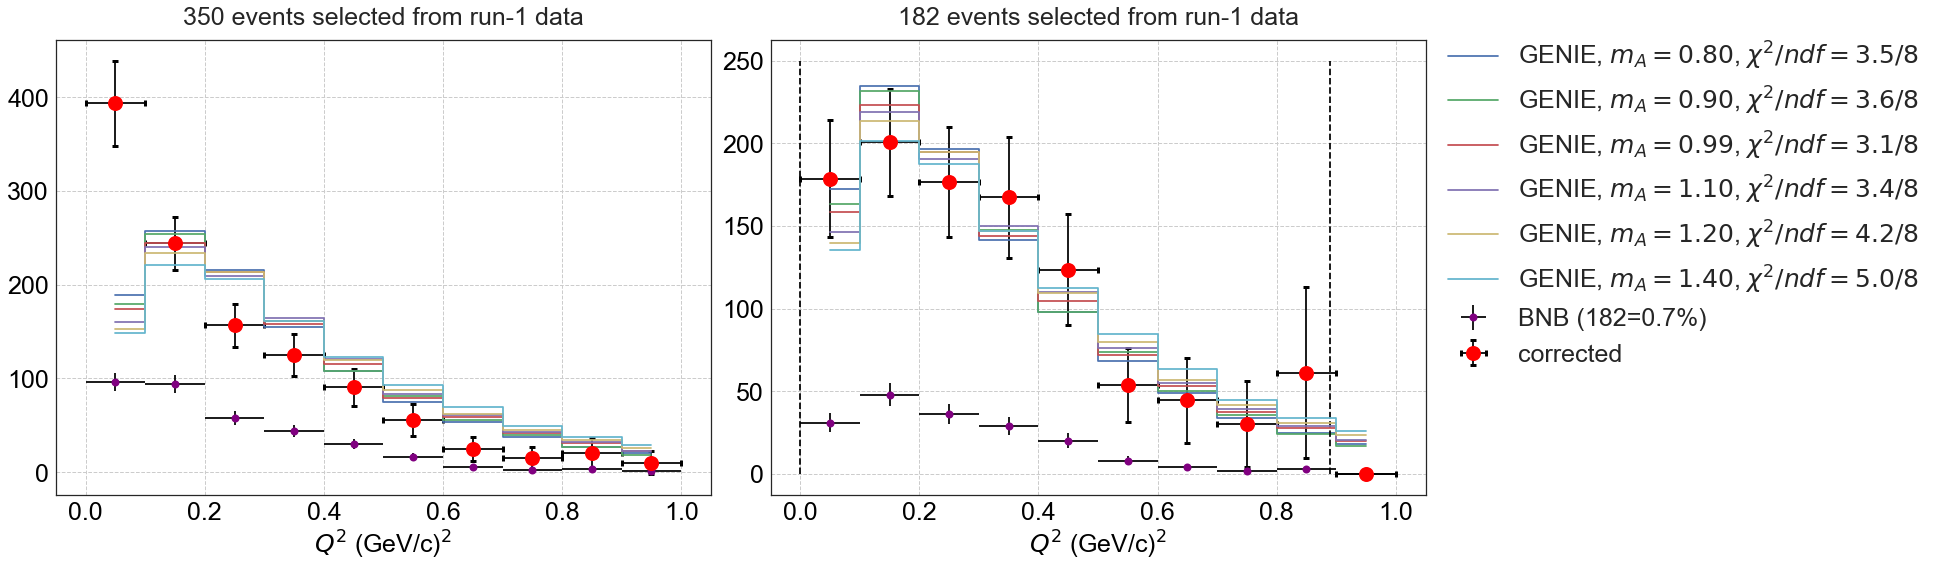

In [36]:
fig_final=plt.figure(figsize=(20,8))
for ioverlay,(OverlaySamples
              ,OnBeamSample
              ,CC1p0piSample) in enumerate(zip([selected_overlay,selected_overlay_tightFV]
                                              ,[selected_events,selected_events_tightFV]
                                               ,[selected_CC1p0pi,selected_CC1p0pi_tightFV])):
    ax_final = fig_final.add_subplot(1,2,ioverlay + 1)
    _,h_OnBeam = plot_OnBeam(OnBeamSample=OnBeamSample,OnBeamFV=OnBeamFV,markersize=8
                                             ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
    h_OnBeam_corrected = h_OnBeam*C[ioverlay]
    h_OnBeam_corrected_err = np.sqrt(np.square(h_OnBeam*C_err[ioverlay])+ np.square(np.sqrt(h_OnBeam)*C[ioverlay]))

    plt.errorbar(x=mid , xerr=bin_width , y=h_OnBeam_corrected , yerr=h_OnBeam_corrected_err
                 ,color='red',ecolor='black',label='corrected'
                 ,markersize=15,fmt='o',capsize=3,capthick=3)
    
    # Add GENIE distributions
    Integral_OnBeam = np.sum(h_OnBeam_corrected)
    ylim = (0,250)
    for mA in mA_array:
        Q2 = genie_CC1p0pi[mA]['Q2']
        hGenie,edges = np.histogram(Q2,bins=bins)
        Integral = np.float(np.sum(hGenie))
        hGenie_err = np.sqrt(hGenie)*(Integral_OnBeam/Integral)
        hGenie = hGenie*(Integral_OnBeam/Integral)
        chi2,ndf=0,0
        if ioverlay==1:
            chi2_xrange=(0,0.89)
            chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange
                                             , h1=h_OnBeam_corrected       , h2=hGenie
                                             , h1err=h_OnBeam_corrected_err, h2err=hGenie_err
                                             , debug=0 )
            if mA==0.99: plt.plot([chi2_xrange[0],chi2_xrange[0]],ylim,'--',[chi2_xrange[1],chi2_xrange[1]],ylim,'--',color='black')
        plt.step(x=mid , y=hGenie , where='mid' 
                 , label=('GENIE, $m_A=%.2f$'%mA + r', $\chi^2/ndf=%.1f/%d$'%(chi2,ndf)))
        
    set_axes(ax_final,x_label,'',title='%d events selected from run-1 data'%len(OnBeamSample),do_add_grid=True,alpha_grid=1)
    if ioverlay==1: plt.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.tight_layout()